In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = lambda x: os.path.join('archive', x) 

In [3]:
pd.read_csv(filepath('lap_times.csv'))

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566


In [4]:
os.listdir('archive')

['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [5]:
races = pd.read_csv(filepath('races.csv'))
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,2022-10-09,05:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...,2022-10-07,03:00:00,2022-10-07,06:00:00,2022-10-08,03:00:00,2022-10-08,06:00:00,\N,\N
1075,1093,2022,19,69,United States Grand Prix,2022-10-23,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...,2022-10-21,19:00:00,2022-10-21,22:00:00,2022-10-22,19:00:00,2022-10-22,22:00:00,\N,\N
1076,1094,2022,20,32,Mexico City Grand Prix,2022-10-30,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...,2022-10-28,18:00:00,2022-10-28,21:00:00,2022-10-29,17:00:00,2022-10-29,20:00:00,\N,\N
1077,1095,2022,21,18,Brazilian Grand Prix,2022-11-13,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...,2022-11-11,15:30:00,2022-11-12,15:30:00,\N,\N,2022-11-11,19:00:00,2022-11-12,19:30:00


In [6]:
circuits = pd.read_csv(filepath('circuits.csv'))
const = pd.read_csv(filepath('constructors.csv'))
const_res = pd.read_csv(filepath('constructor_results.csv'))
const_stand = pd.read_csv(filepath('constructor_standings.csv'))

In [7]:
print(const_res.constructorResultsId.is_unique)
const_res = const_res.set_index('constructorResultsId')
const_stand = const_stand.set_index('constructorStandingsId')

True


In [8]:
const_results = const.merge(const_res, on='constructorId', how='right')
const_results

,constructorId,constructorRef,name,nationality,url,raceId,points,status
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N
...,...,...,...,...,...,...,...,...
12165,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N
12166,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N
12167,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N
12168,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N


In [9]:
const_full = const_results.merge(const_stand, on=['constructorId','raceId'], suffixes=['','_stand']).rename(columns={'points_stand':'points_cumu'})
const_full

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0


In [10]:
full = const_full.merge(races.rename(columns={'name': 'race_name', 'url':'race_url'}), on='raceId')

In [11]:
full

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,...,2022-11-18,10:00:00,2022-11-18,13:00:00,2022-11-19,11:00:00,2022-11-19,14:00:00,\N,\N


In [12]:
full_reduced = full.drop(columns=['fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'race_url', 'sprint_time'])
full_reduced

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins,year,round,circuitId,race_name,date,time
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00


In [13]:
data = full_reduced
data

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins,year,round,circuitId,race_name,date,time
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00


In [17]:
# Create 
data['points_2022'] = data.groupby('raceId')['points'].rank(method='max', ascending=False).map({
        1:25,
        2:18,
        3:15,
        4:12,
        5:10,
        6:8,
        7:6,
        8:4,
        9:2,
        10:1
    }).fillna(0)
data

,constructorId,constructorRef,name,nationality,url,raceId,points,status,points_cumu,position,positionText,wins,year,round,circuitId,race_name,date,time,points_2022
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,18,14.0,\N,14.0,1,1,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,25.0
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,18,8.0,\N,8.0,3,3,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,15.0
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,18,9.0,\N,9.0,2,2,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,18.0
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,18,5.0,\N,5.0,4,4,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,12.0
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,18,2.0,\N,2.0,5,5,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12032,117,aston_martin,Aston Martin,British,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,1096,5.0,\N,55.0,7,7,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,8.0
12033,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,1096,0.0,\N,35.0,9,9,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,1.0
12034,51,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,1096,0.0,\N,55.0,6,6,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,1.0
12035,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,1096,0.0,\N,8.0,10,10,0,2022,22,24,Abu Dhabi Grand Prix,2022-11-20,13:00:00,1.0


<AxesSubplot:xlabel='position', ylabel='name'>

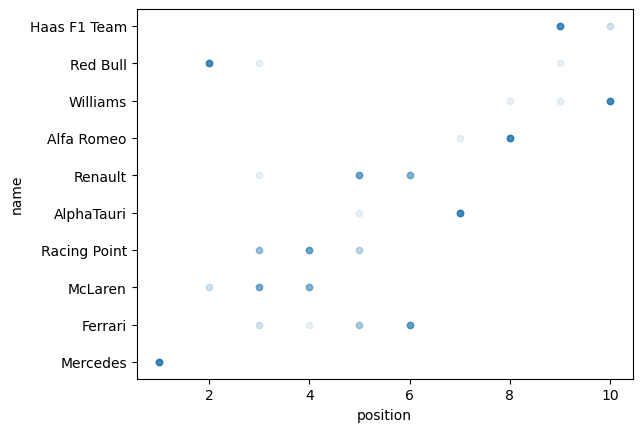

In [21]:
data[data.year == 2020].plot(kind='scatter', x='position', y='name', alpha=.1)

<AxesSubplot:xlabel='round', ylabel='wins'>

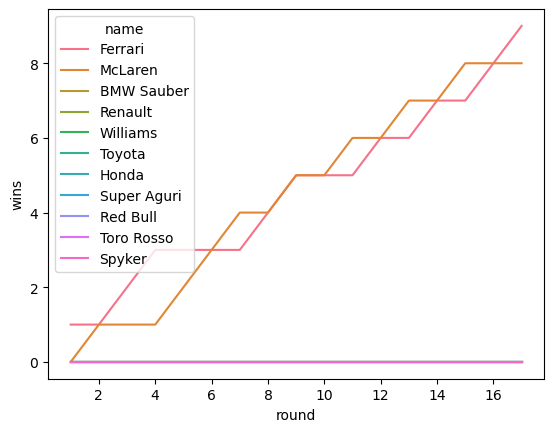

In [22]:
sns.lineplot(data=full_reduced[full_reduced.year == 2007], x='round', y='wins', hue='name')

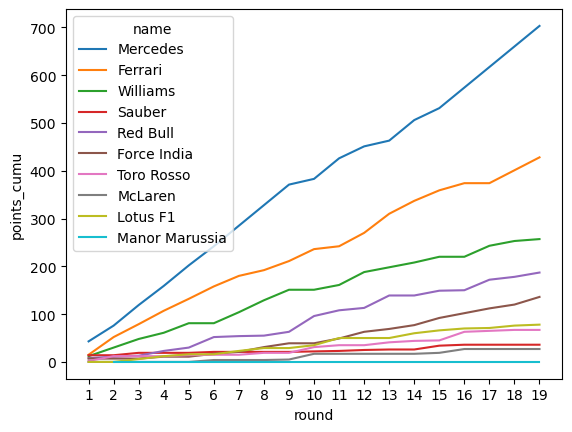

In [23]:
pl = sns.lineplot(data=data[data.year == 2015], x='round', y='points_cumu', hue='name', markers=True)
pl.set_xticks(range(1, data[data.year == 2015]['round'].astype(int).max() + 1));

## Constructor questions
- What constructors have the best points on average (average points / race participated in)?
- How have constructor placements varied over the years (How was a specific team developed over years?)
- Would their placement be different if it was only 1 driver per constructor instead of 2?
- Do certain constructors perform better on shorter tracks (grand prix's with less laps overall)?
- Does nationality of the constructor give any performance edge in local areas?
- If a racer switched teams, did his rank change? (May be useful for determining difference in cars)
- What constructors have the most wins?
- What is the distribution of pitstop times?

## Other curious questions
- Whats the average lap time on given courses and how have they changed over the years (Need to scrape F1 site for information)

### Best points on average

<AxesSubplot:title={'center':'Average points per race'}, ylabel='Constructor'>

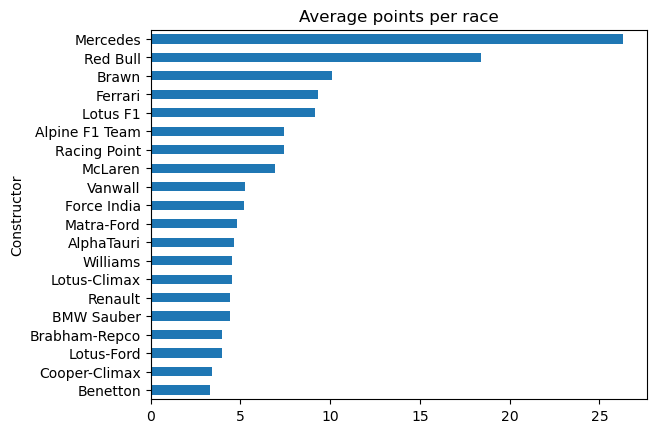

In [26]:
(
    data.groupby('name')['points']
    .mean().sort_values(ascending=False).head(20)
    .iloc[::-1]
    .plot(kind='barh',
          xlabel='Constructor', 
          ylabel='Average Points per race',
         title='Average points per race')
)

<AxesSubplot:ylabel='Frequency'>

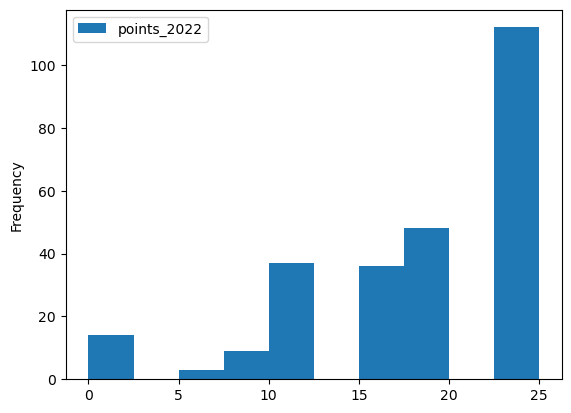

In [30]:
data[data.name == 'Mercedes'].plot(kind='hist', y='points_2022')

<AxesSubplot:ylabel='Frequency'>

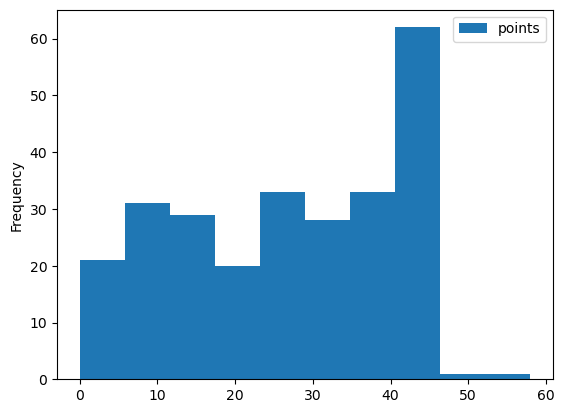

In [29]:
data[data.name == 'Mercedes'].plot(kind='hist', y='points')

<AxesSubplot:title={'center':'Average points per race'}, ylabel='Constructor'>

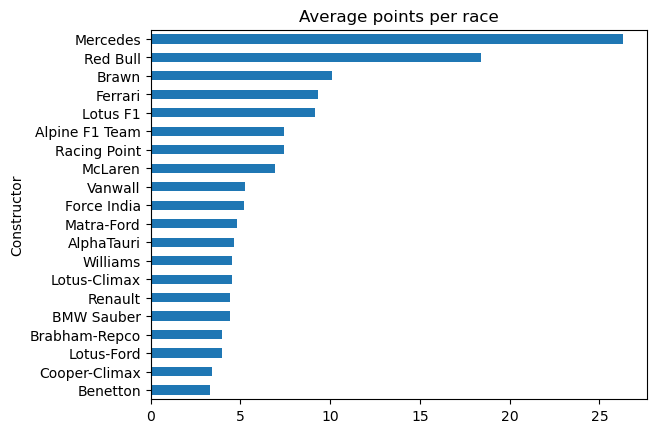

In [31]:
(
    data.groupby('name')['points']
    .mean().sort_values(ascending=False).head(20)
    .iloc[::-1]
    .plot(kind='barh',
          xlabel='Constructor', 
          ylabel='Average Points per race',
         title='Average points per race')
)

In [33]:
data.groupby(['year', 'name'])['points_cumu'].max().rank(method='max')

year  name        
1958  BRM             520.0
      Connaught       249.0
      Cooper          597.0
      Ferrari         648.0
      Maserati        388.0
                      ...  
2022  Haas F1 Team    634.0
      McLaren         829.0
      Mercedes        884.0
      Red Bull        898.0
      Williams        420.0
Name: points_cumu, Length: 899, dtype: float64

In [34]:
total_points = data.groupby(['year', 'name'])['points_cumu'].max().reset_index()
total_points['year_rank'] = total_points.groupby('year')['points_cumu'].rank(method='max', ascending=False)
total_points

,year,name,points_cumu,year_rank
0,1958,BRM,18.0,4.0
1,1958,Connaught,0.0,9.0
2,1958,Cooper,31.0,3.0
3,1958,Ferrari,40.0,2.0
4,1958,Maserati,6.0,5.0
...,...,...,...,...
894,2022,Haas F1 Team,37.0,8.0
895,2022,McLaren,159.0,5.0
896,2022,Mercedes,515.0,3.0
897,2022,Red Bull,759.0,1.0


<AxesSubplot:xlabel='year_rank', ylabel='name'>

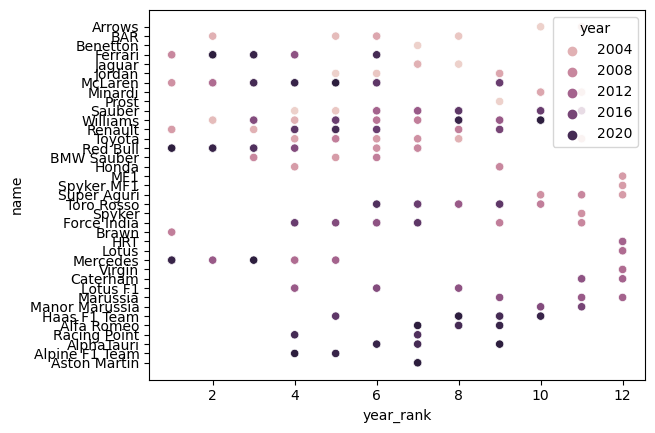

In [35]:
sns.scatterplot(data=total_points[total_points.year > 2000], x='year_rank', y='name', hue='year', x_jitter=True)

<AxesSubplot:xlabel='year_rank', ylabel='name'>

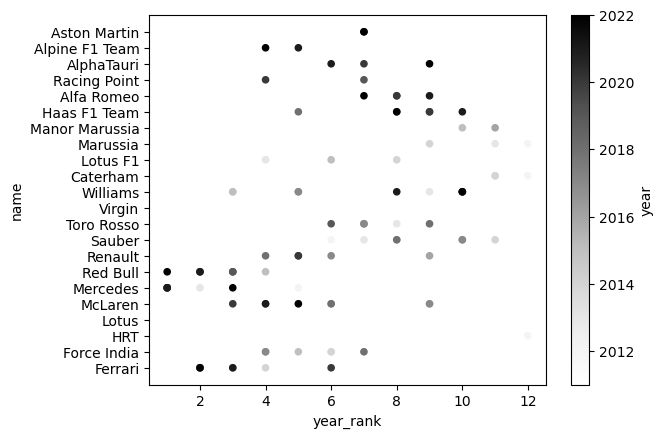

In [36]:
total_points[total_points.year > 2010].plot(kind='scatter', x='year_rank', y='name', c='year', )

In [39]:
total_points

,year,name,points_cumu,year_rank
0,1958,BRM,18.0,4.0
1,1958,Connaught,0.0,9.0
2,1958,Cooper,31.0,3.0
3,1958,Ferrari,40.0,2.0
4,1958,Maserati,6.0,5.0
...,...,...,...,...
894,2022,Haas F1 Team,37.0,8.0
895,2022,McLaren,159.0,5.0
896,2022,Mercedes,515.0,3.0
897,2022,Red Bull,759.0,1.0


In [37]:
total_points[total_points.year_rank == 1].groupby('name')['year_rank'].sum().sum()

65.0

<AxesSubplot:title={'center':'Total wins'}, ylabel='Team'>

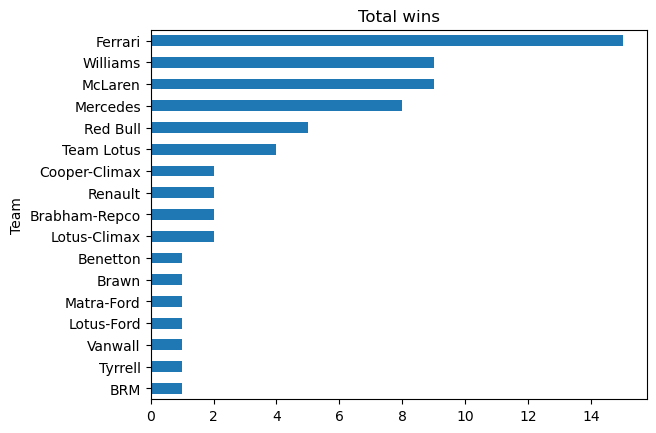

In [42]:
total_points[total_points.year_rank == 1].groupby('name')['year_rank'].sum().sort_values().plot(kind='barh', title='Total wins', xlabel='Team', ylabel='Wins')

### Nationality boost
Do constructors from the same continent perform better on average?

## Number of seasons
How many years have constructors participated in? How many of those have they won?

In [43]:
total_points['won'] = total_points.year_rank == 1
total_points.groupby('name')['won'].sum()

name
AGS               0
ATS               0
Alfa Romeo        0
AlphaTauri        0
Alpine F1 Team    0
                 ..
Vanwall           1
Virgin            0
Williams          9
Wolf              0
Zakspeed          0
Name: won, Length: 159, dtype: int64

In [44]:
const_stats = const.set_index('name')
total_points['won'] = total_points.year_rank == 1
const_stats['years_in'] = total_points.groupby('name').count()['year']
const_stats['years_won'] = total_points.groupby('name')['won'].sum()
const_stats

,constructorId,constructorRef,nationality,url,years_in,years_won
name,,,,,,
McLaren,1,mclaren,British,http://en.wikipedia.org/wiki/McLaren,53.0,9.0
BMW Sauber,2,bmw_sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,4.0,0.0
Williams,3,williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,47.0,9.0
Renault,4,renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,24.0,2.0
Toro Rosso,5,toro_rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,14.0,0.0
...,...,...,...,...,...,...
Manor Marussia,209,manor,British,http://en.wikipedia.org/wiki/Manor_Motorsport,2.0,0.0
Haas F1 Team,210,haas,American,http://en.wikipedia.org/wiki/Haas_F1_Team,7.0,0.0
Racing Point,211,racing_point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team,2.0,0.0


In [45]:
data[data.name == 'Ferrari'].year.unique().min()

1958

<AxesSubplot:title={'center':'Years Won vs Years Participated '}, ylabel='name'>

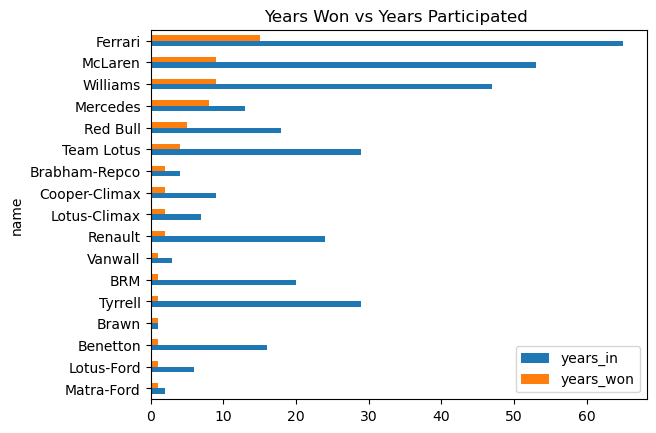

In [47]:
const_stats[const_stats.years_won >= 1].get(['years_in', 'years_won']).sort_values(by='years_won').plot(kind='barh', title='Years Won vs Years Participated ')

### Other ideas

Number of do not finishes over the years

Estimate overall lap times based off of fastest racer (fastest time + fastest_time/laps * laps behind)

Qualifying time -> position of grand prix -> ending position in grand prix

In [ ]:
pd.read_csv(filepath('qualifying.csv'))

In [ ]:
(pd.read_csv(filepath('qualifying.csv')).q1 == '\\N').mean()

In [ ]:
pd.read_csv(filepath('results.csv'))

In [ ]:
os.listdir('archive')

In [ ]:
data

## Overall ranking:
i = racer won against
j = racer lost against

Win rate: Races won / total races in

points average: points / races

Fastest lap on circuits 

Average time per lap on different grand prix locations



In [ ]:
drivers = pd.read_csv(filepath('drivers.csv'))
drivers

In [ ]:
drivers.nationality.value_counts()

Effect of geo-economical (is that the word?) factors on racing